In [10]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 192s 1us/step


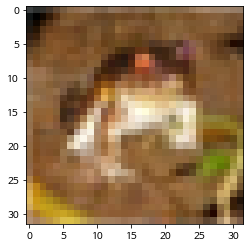

In [7]:
#확인
X_train.shape #2차원이니깐 1차원으로 만들어줘야 함
X_train[0]
y_train[0]
plt.imshow(X_train[0])

In [11]:
X_train = X_train.reshape(-1,X_train.shape[1]*X_train.shape[2]*X_train.shape[3]) #가로*세로*깊이
X_test = X_test.reshape(-1,X_test.shape[1]*X_test.shape[2]*X_test.shape[3])
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
input_shape = X_train.shape[1]
output_shape = y_train.shape[1]

model = Sequential()
model.add(Dense(1024,activation='relu',input_shape=(input_shape,)))
model.add(Dense(2048,activation='relu'))
model.add(Dense(2024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(output_shape,activation='softmax'))

In [13]:
optimizer="adam"
loss="categorical_crossentropy"
metrics=["accuracy"]
model.compile(optimizer=optimizer,
                      loss=loss,
                      metrics=metrics)

In [14]:
epochs = 20
batch_size = 400
model.fit(X_train,
         y_train,
         epochs=epochs,
         batch_size=batch_size)

Epoch 1/20
125/125 [==============================] - 13s 105ms/step - loss: 70.3773 - accuracy: 0.0993
Epoch 2/20
125/125 [==============================] - 13s 106ms/step - loss: 2.3032 - accuracy: 0.0997
Epoch 3/20
125/125 [==============================] - 13s 103ms/step - loss: 2.3024 - accuracy: 0.0963
Epoch 4/20
125/125 [==============================] - 13s 106ms/step - loss: 2.3023 - accuracy: 0.0989
Epoch 5/20
125/125 [==============================] - 14s 111ms/step - loss: 2.3021 - accuracy: 0.0991
Epoch 6/20
125/125 [==============================] - 13s 105ms/step - loss: 2.3020 - accuracy: 0.0957
Epoch 7/20
125/125 [==============================] - 13s 102ms/step - loss: 2.3021 - accuracy: 0.0986
Epoch 8/20
125/125 [==============================] - 13s 100ms/step - loss: 2.3019 - accuracy: 0.0963
Epoch 9/20
125/125 [==============================] - 13s 101ms/step - loss: 2.3021 - accuracy: 0.0976
Epoch 10/20
125/125 [==============================] - 13s 101ms/step - 

In [18]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 3.5168 - accuracy: 0.4763


[3.516845703125, 0.4763000011444092]

In [15]:
#BatchNormalization추가 해서 돌려보기

input_shape = X_train.shape[1]
output_shape = y_train.shape[1]

model = Sequential()
model.add(Dense(1024,activation='relu',input_shape=(input_shape,)))
model.add(BatchNormalization())
model.add(Dense(2048,activation='relu'))
model.add(Dense(2024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(output_shape,activation='softmax'))

optimizer="adam"
loss="categorical_crossentropy"
metrics=["accuracy"]
model.compile(optimizer=optimizer,
                      loss=loss,
                      metrics=metrics)

epochs = 20
batch_size = 200
model.fit(X_train,
         y_train,
         epochs=epochs,
         batch_size=batch_size)

Epoch 1/20
250/250 [==============================] - 22s 86ms/step - loss: 1.7393 - accuracy: 0.3828
Epoch 2/20
250/250 [==============================] - 21s 84ms/step - loss: 1.5234 - accuracy: 0.4557
Epoch 3/20
250/250 [==============================] - 21s 83ms/step - loss: 1.4210 - accuracy: 0.4903
Epoch 4/20
250/250 [==============================] - 21s 84ms/step - loss: 1.3424 - accuracy: 0.5194
Epoch 5/20
250/250 [==============================] - 21s 84ms/step - loss: 1.2613 - accuracy: 0.5501
Epoch 6/20
250/250 [==============================] - 21s 84ms/step - loss: 1.1986 - accuracy: 0.5723
Epoch 7/20
250/250 [==============================] - 21s 84ms/step - loss: 1.1211 - accuracy: 0.5964
Epoch 8/20
250/250 [==============================] - 21s 84ms/step - loss: 1.0528 - accuracy: 0.6217
Epoch 9/20
250/250 [==============================] - 21s 84ms/step - loss: 0.9804 - accuracy: 0.6476
Epoch 10/20
250/250 [==============================] - 21s 84ms/step - loss: 0.898

In [24]:
#모델을 나눠서 돌려보기
from sklearn.model_selection import train_test_split

(X_train,y_train),(X_test,y_test)=cifar10.load_data()

X_train = X_train.reshape(-1,X_train.shape[1]*X_train.shape[2]*X_train.shape[3])
X_test = X_test.reshape(-1,X_test.shape[1]*X_test.shape[2]*X_test.shape[3])
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=.2)

input_shape = X_train.shape[1]
output_shape = y_train.shape[1]

model = Sequential()
model.add(Dense(1024,activation='relu',input_shape=(input_shape,)))
model.add(Dense(2048,activation='relu'))
model.add(Dense(2024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(output_shape,activation='softmax'))

optimizer="adam"
loss="categorical_crossentropy"
metrics=["accuracy"]
model.compile(optimizer=optimizer,
                      loss=loss,
                      metrics=metrics)

epochs = 20
batch_size = 400
model.fit(X_train,
         y_train,
         epochs=epochs,
         batch_size=batch_size)

Epoch 1/20
100/100 [==============================] - 11s 106ms/step - loss: 83.0610 - accuracy: 0.2245
Epoch 2/20
100/100 [==============================] - 11s 108ms/step - loss: 1.8346 - accuracy: 0.3376
Epoch 3/20
100/100 [==============================] - 11s 107ms/step - loss: 1.7418 - accuracy: 0.3742
Epoch 4/20
100/100 [==============================] - 11s 106ms/step - loss: 1.6854 - accuracy: 0.3927
Epoch 5/20
100/100 [==============================] - 11s 106ms/step - loss: 1.6395 - accuracy: 0.4099
Epoch 6/20
100/100 [==============================] - 11s 106ms/step - loss: 1.5881 - accuracy: 0.4297
Epoch 7/20
100/100 [==============================] - 11s 108ms/step - loss: 1.5552 - accuracy: 0.4414
Epoch 8/20
100/100 [==============================] - 11s 106ms/step - loss: 1.5132 - accuracy: 0.4568
Epoch 9/20
100/100 [==============================] - 11s 108ms/step - loss: 1.4832 - accuracy: 0.4687
Epoch 10/20
100/100 [==============================] - 11s 113ms/step - 